# Data science approach to organizing my playlist
[Complete Post](https://arjon.es/2020/data-science-approach-to-organizing-my-playlist/)

## Exploratory Data Analysis

In [1]:
from IPython.display import display, HTML # to export to blog post

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = [20, 15]

In [2]:
df = pd.read_csv('my-playlist.csv')
df = df[['track_id', 'track_name', 'danceability', 'energy', 'tempo', 'valence']]

In [3]:
df['url'] = df[['track_id']].apply(lambda x: f"https://open.spotify.com/track/{x['track_id']}", axis=1)

In [4]:
def ddisplay(df):
    def make_clickable(url):
        return f'<a target="_blank" href="{url}">listen</a>'

    display(df[['track_name', 'url']].head(10).style.format({'url': make_clickable}))
    pass

In [5]:
ddisplay(df)

,track_name,url
0,Have You Ever Seen The Rain,listen
1,Break It Down Again,listen
2,Stay,listen
3,A Visita,listen
4,O Que É O Que É?,listen
5,Loving Every Minute,listen
6,Nosso Pequeno Castelo,listen
7,Voce Abusou,listen
8,I Follow Rivers,listen
9,Relicário,listen


In [6]:
df.describe()

,danceability,energy,tempo,valence
count,299.000000,299.000000,299.000000,299.000000
mean,0.598886,0.629162,119.993211,0.574082
std,0.146012,0.213013,26.798519,0.246125
min,0.128000,0.040600,65.179000,0.059100
25%,0.497500,0.479000,99.934500,0.383500
50%,0.615000,0.655000,119.344000,0.588000
75%,0.704000,0.801000,138.004000,0.766500
max,0.941000,0.977000,189.892000,0.985000


In [7]:
def generate_plots(df, fields):
    fig, axes = plt.subplots(4, sharex=True)
    for id, field in enumerate(fields):
        ax = axes[id]
        ax.locator_params(tight=True, nbins=40)
        df.plot.line(x='track_name', y=field, color=f'C{id}', ax = ax, rot=90);
    pass

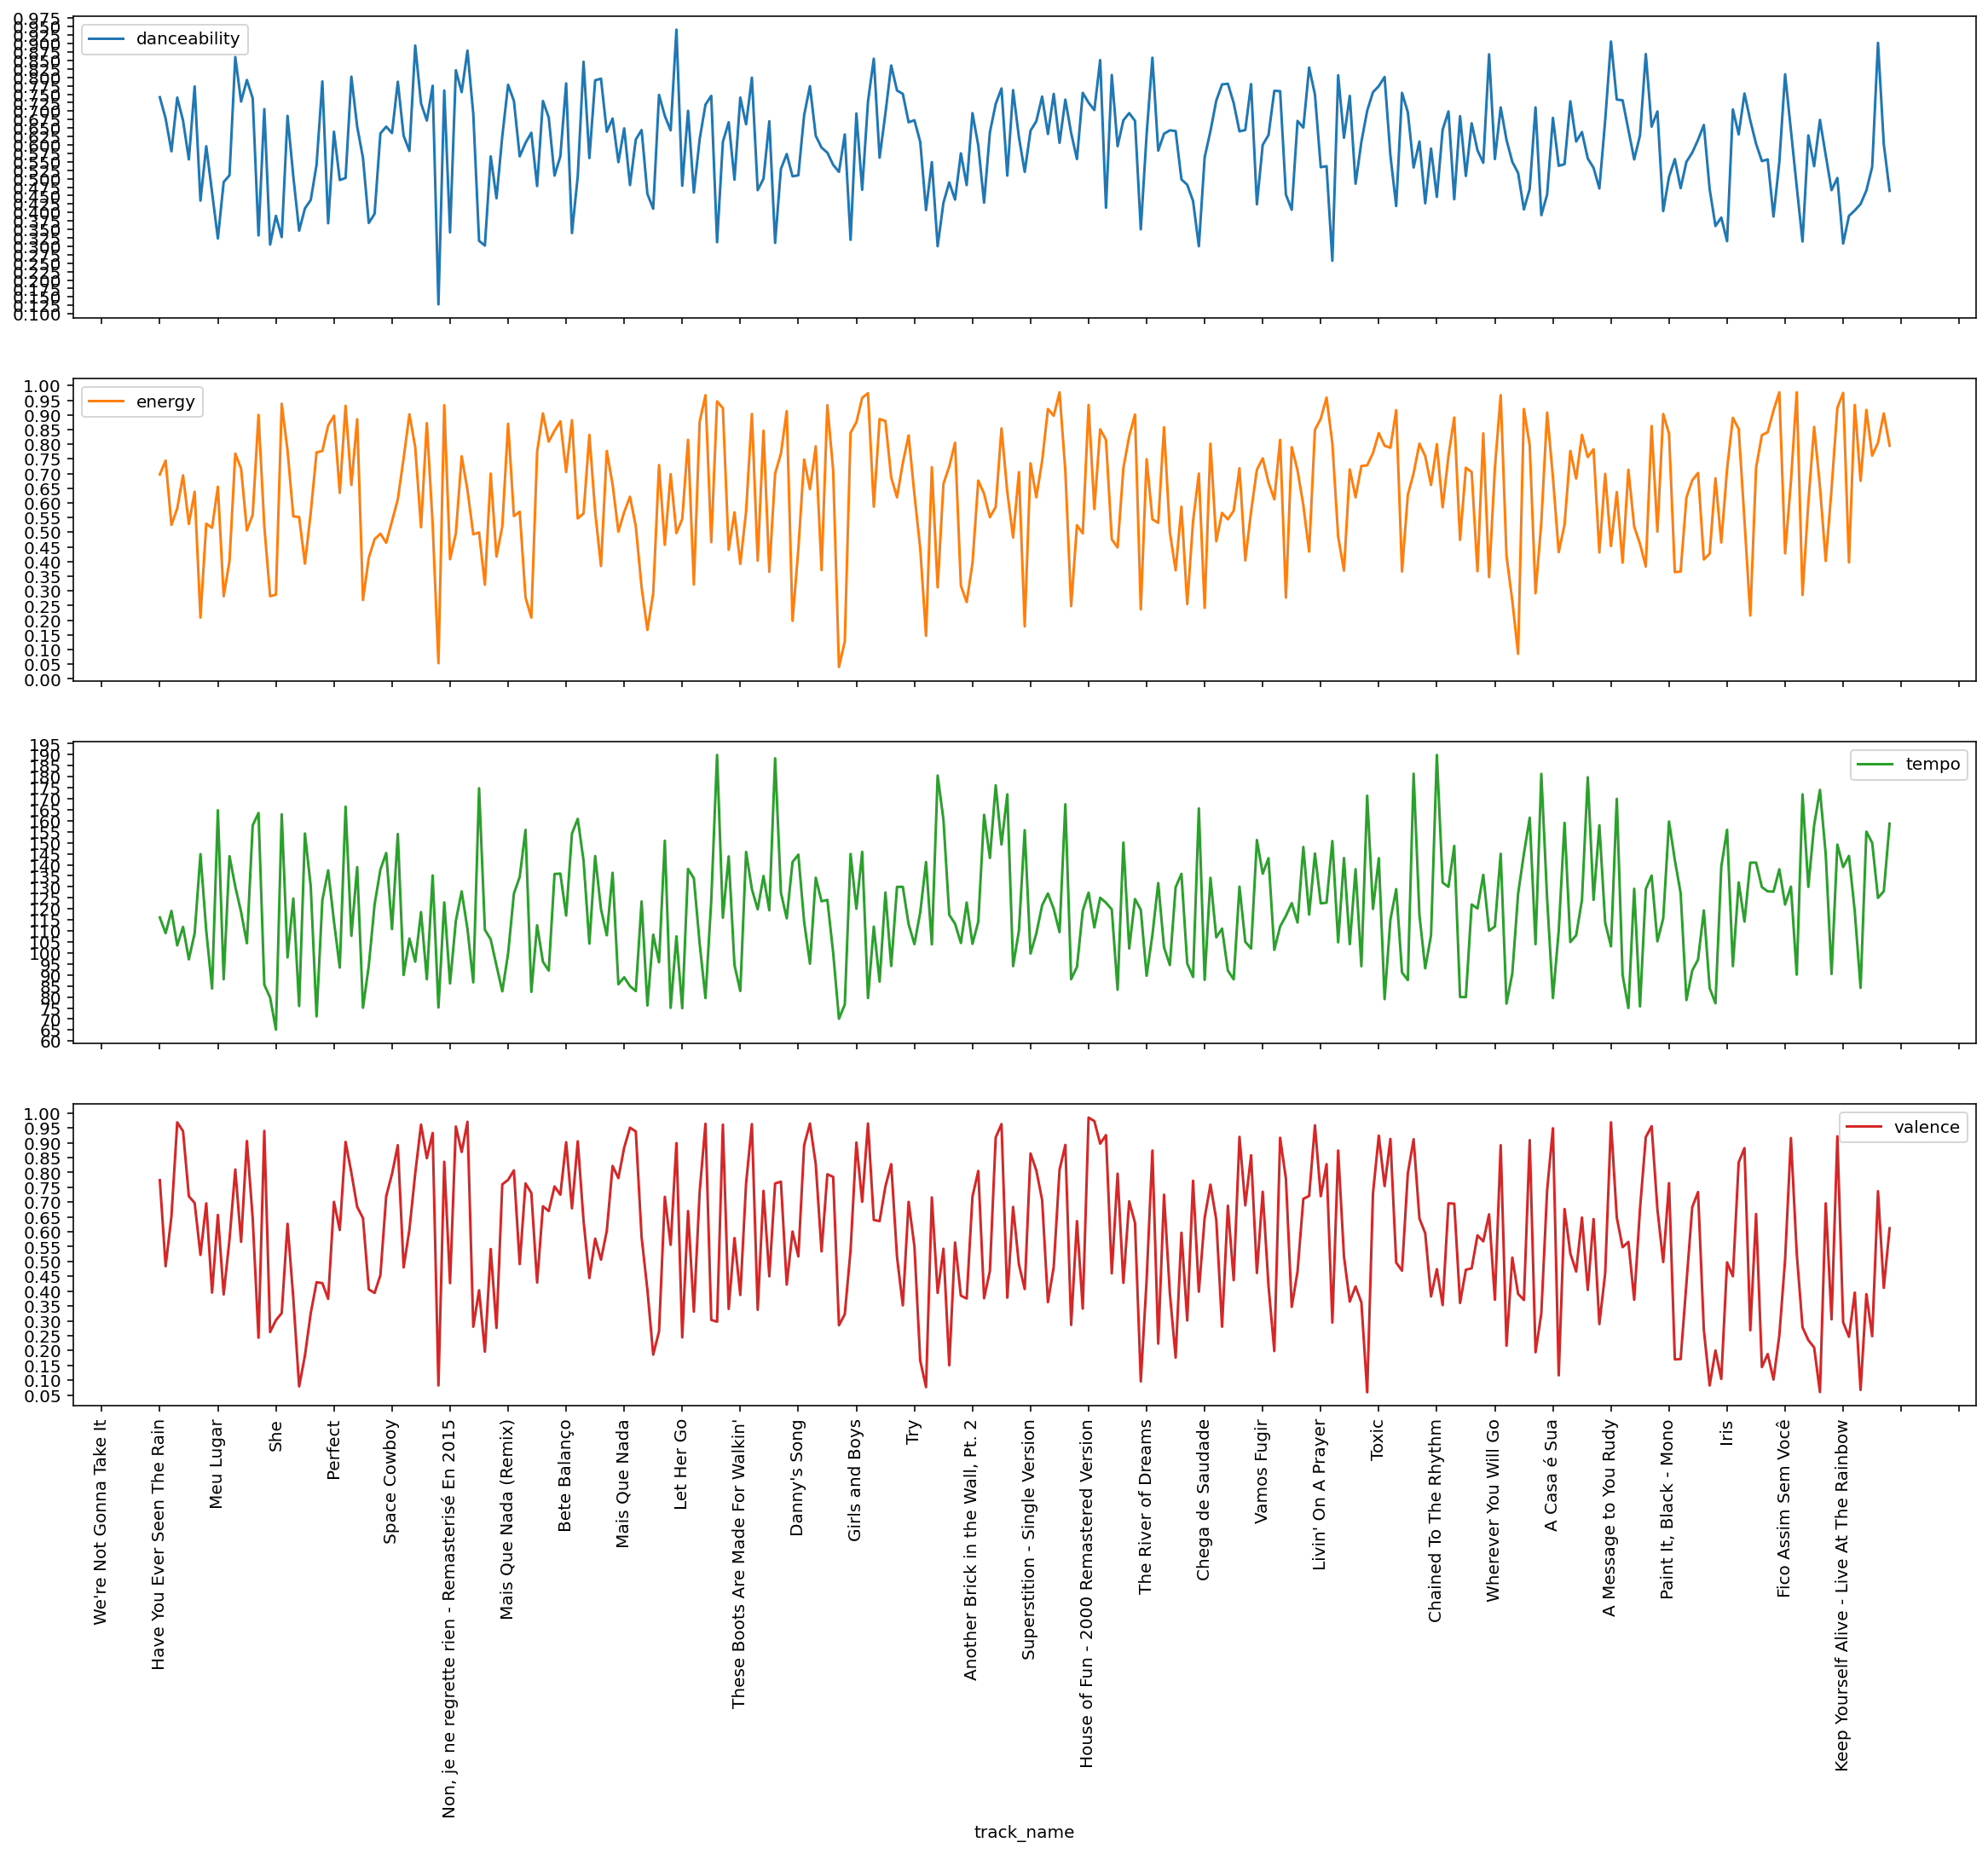

In [8]:
generate_plots(df, fields=['danceability', 'energy', 'tempo', 'valence'])

---
# Sort By `tempo`

In [9]:
df_tempo = df.sort_values(by='tempo').reset_index(drop=True)
ddisplay(df_tempo.sample(n=10, random_state=42).sort_index())

,track_name,url
5,Human,listen
9,Skyfall,listen
77,You Had Me,listen
93,La Belle De Jour,listen
109,I Follow Rivers,listen
164,Cérebro Eletrônico,listen
173,Wake Me Up - Radio Edit,listen
265,Don't Stop Me Now - ...Revisited,listen
278,Paranoid,listen
281,Meu Lugar,listen


In [10]:
# HTML table for the blogpost
# print(df_tempo.drop(columns='track_id').sample(n=10, random_state=42).sort_index().to_html())

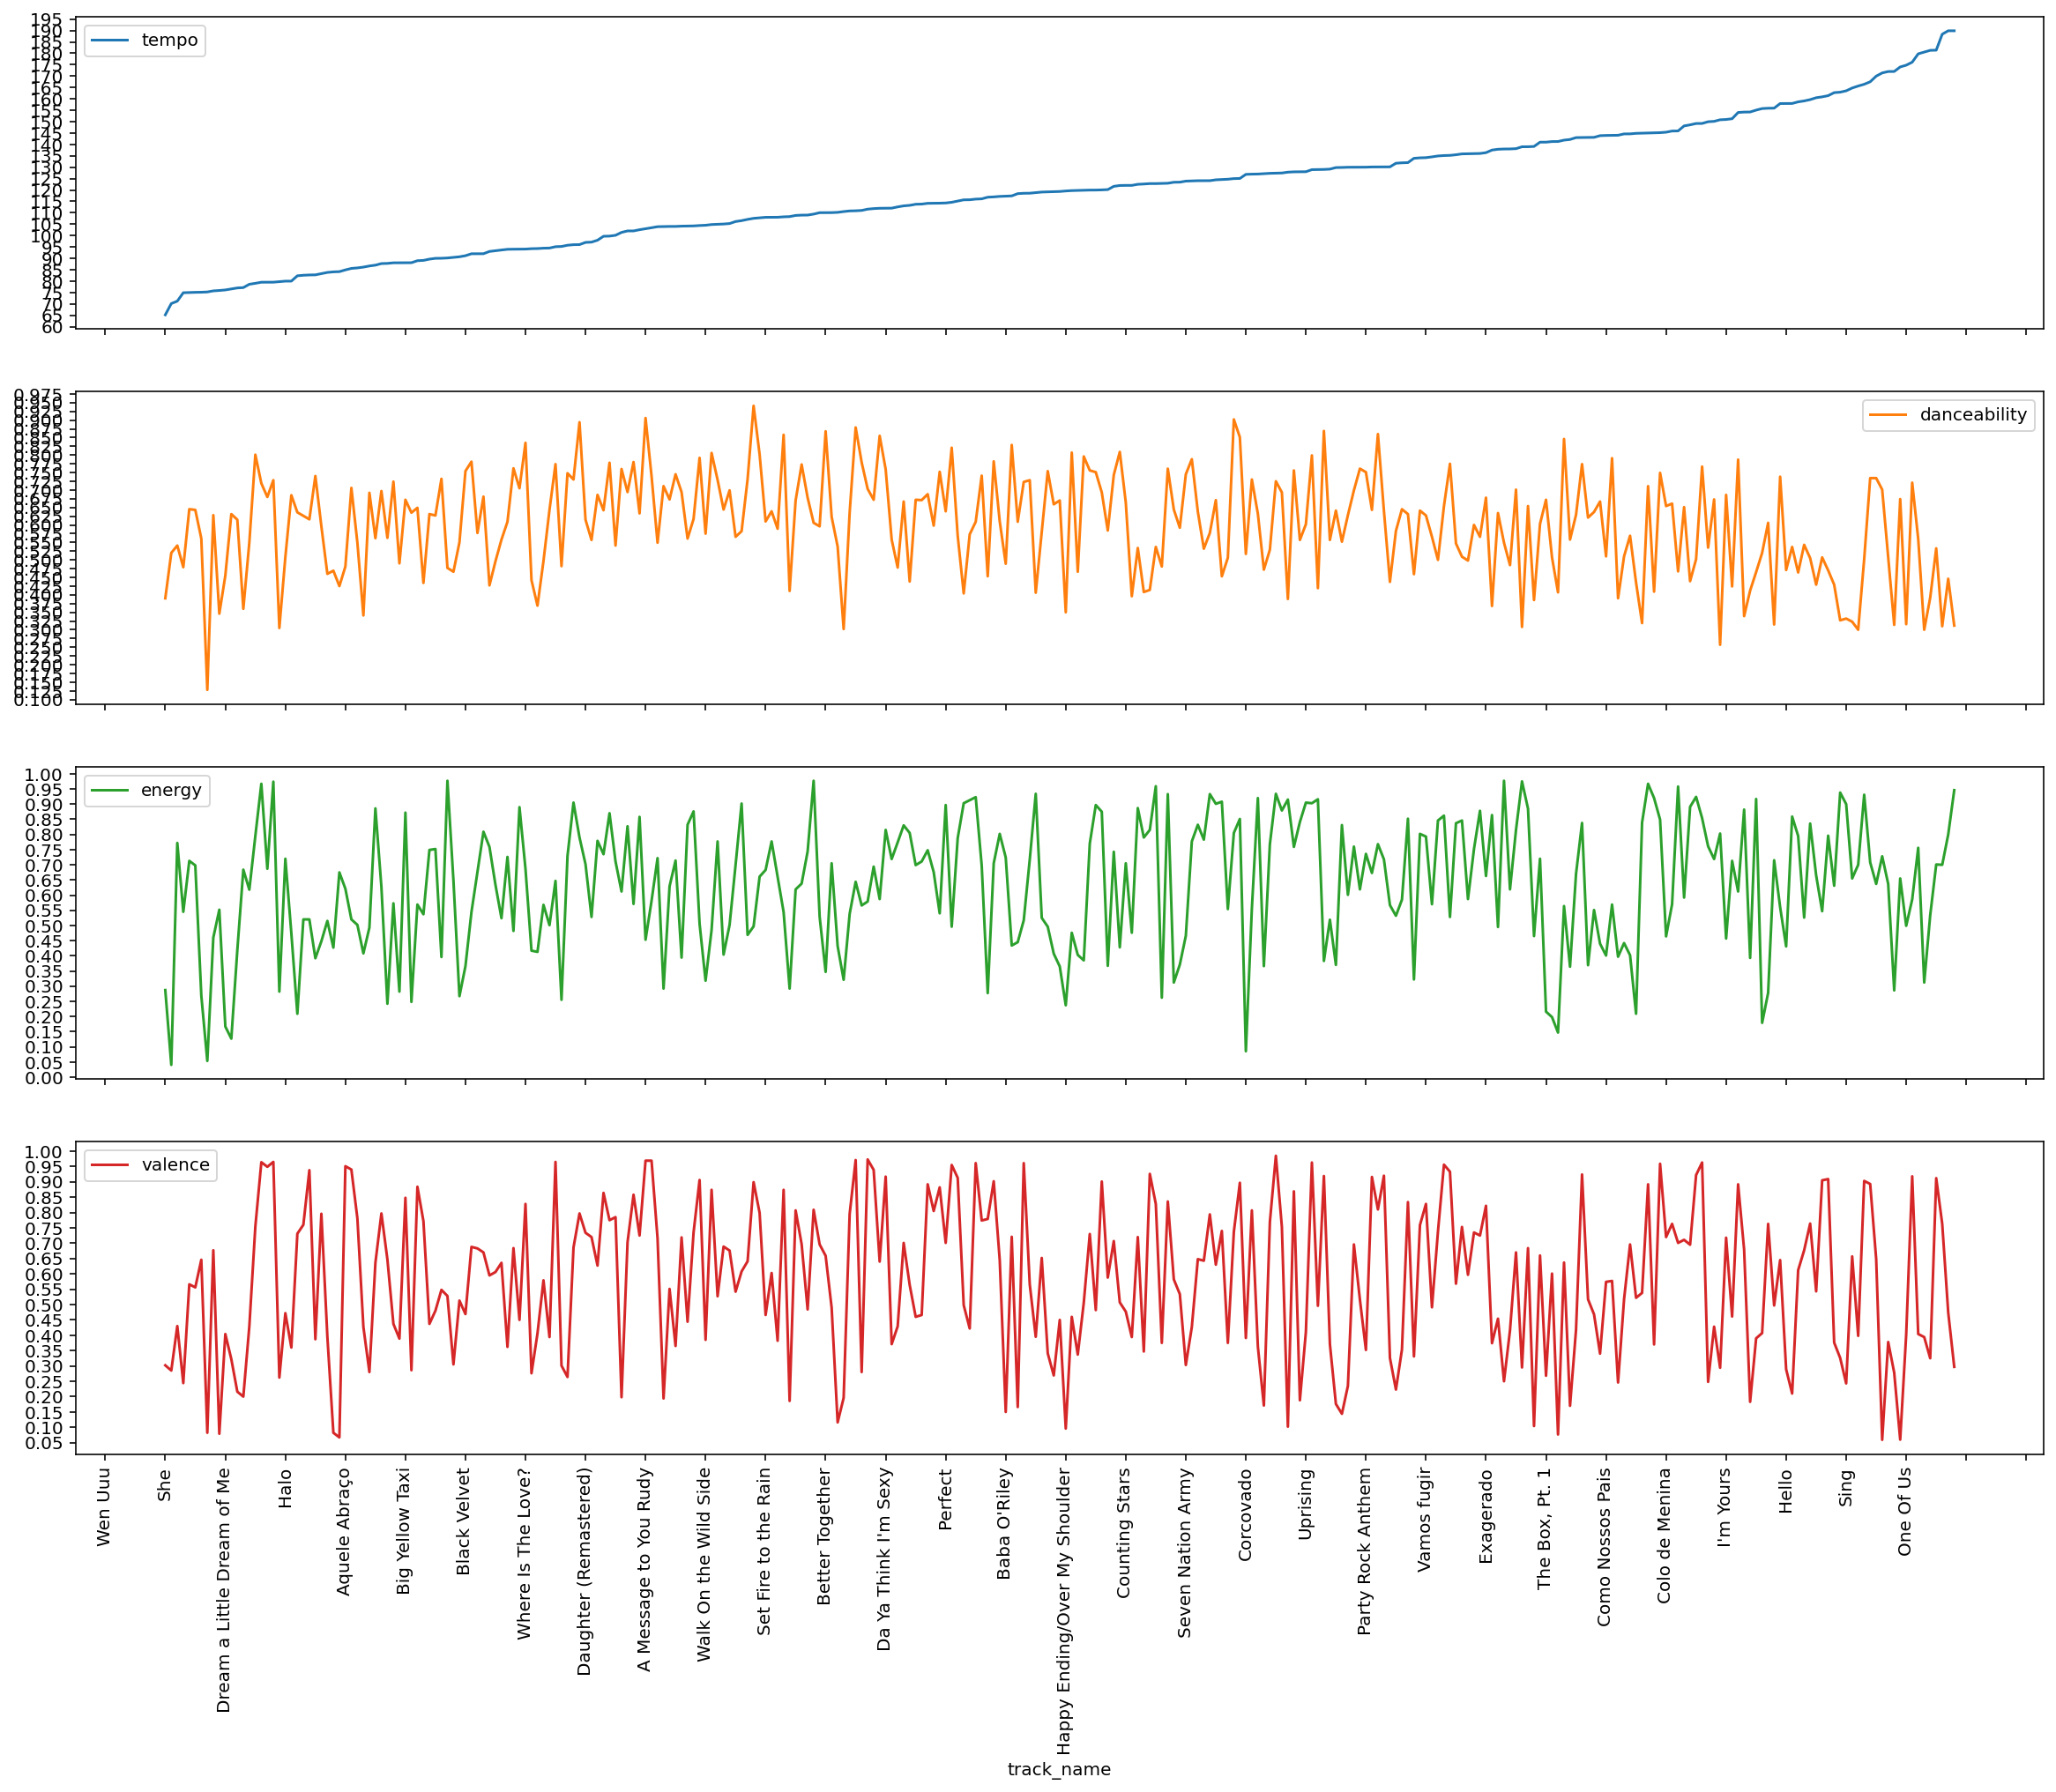

In [11]:
generate_plots(df_tempo, fields=['tempo', 'danceability', 'energy', 'valence'])

---
# Sort By `energy`

In [12]:
df_energy = df.sort_values(by='energy').reset_index(drop=True)
ddisplay(df_energy.sample(n=10, random_state=42).sort_index())

,track_name,url
5,Dream a Little Dream of Me,listen
9,One Note Samba,listen
77,The Thrill Is Gone,listen
93,"Layla - Acoustic; Live at MTV Unplugged, Bray Film Studios, Windsor, England, UK, 1/16/1992; 2013 Remaster",listen
109,Skyfall,listen
164,Have You Ever Seen The Rain,listen
173,Bete Balanço,listen
265,Go,listen
278,Don't Stop Me Now - ...Revisited,listen
281,Smooth (feat. Rob Thomas),listen


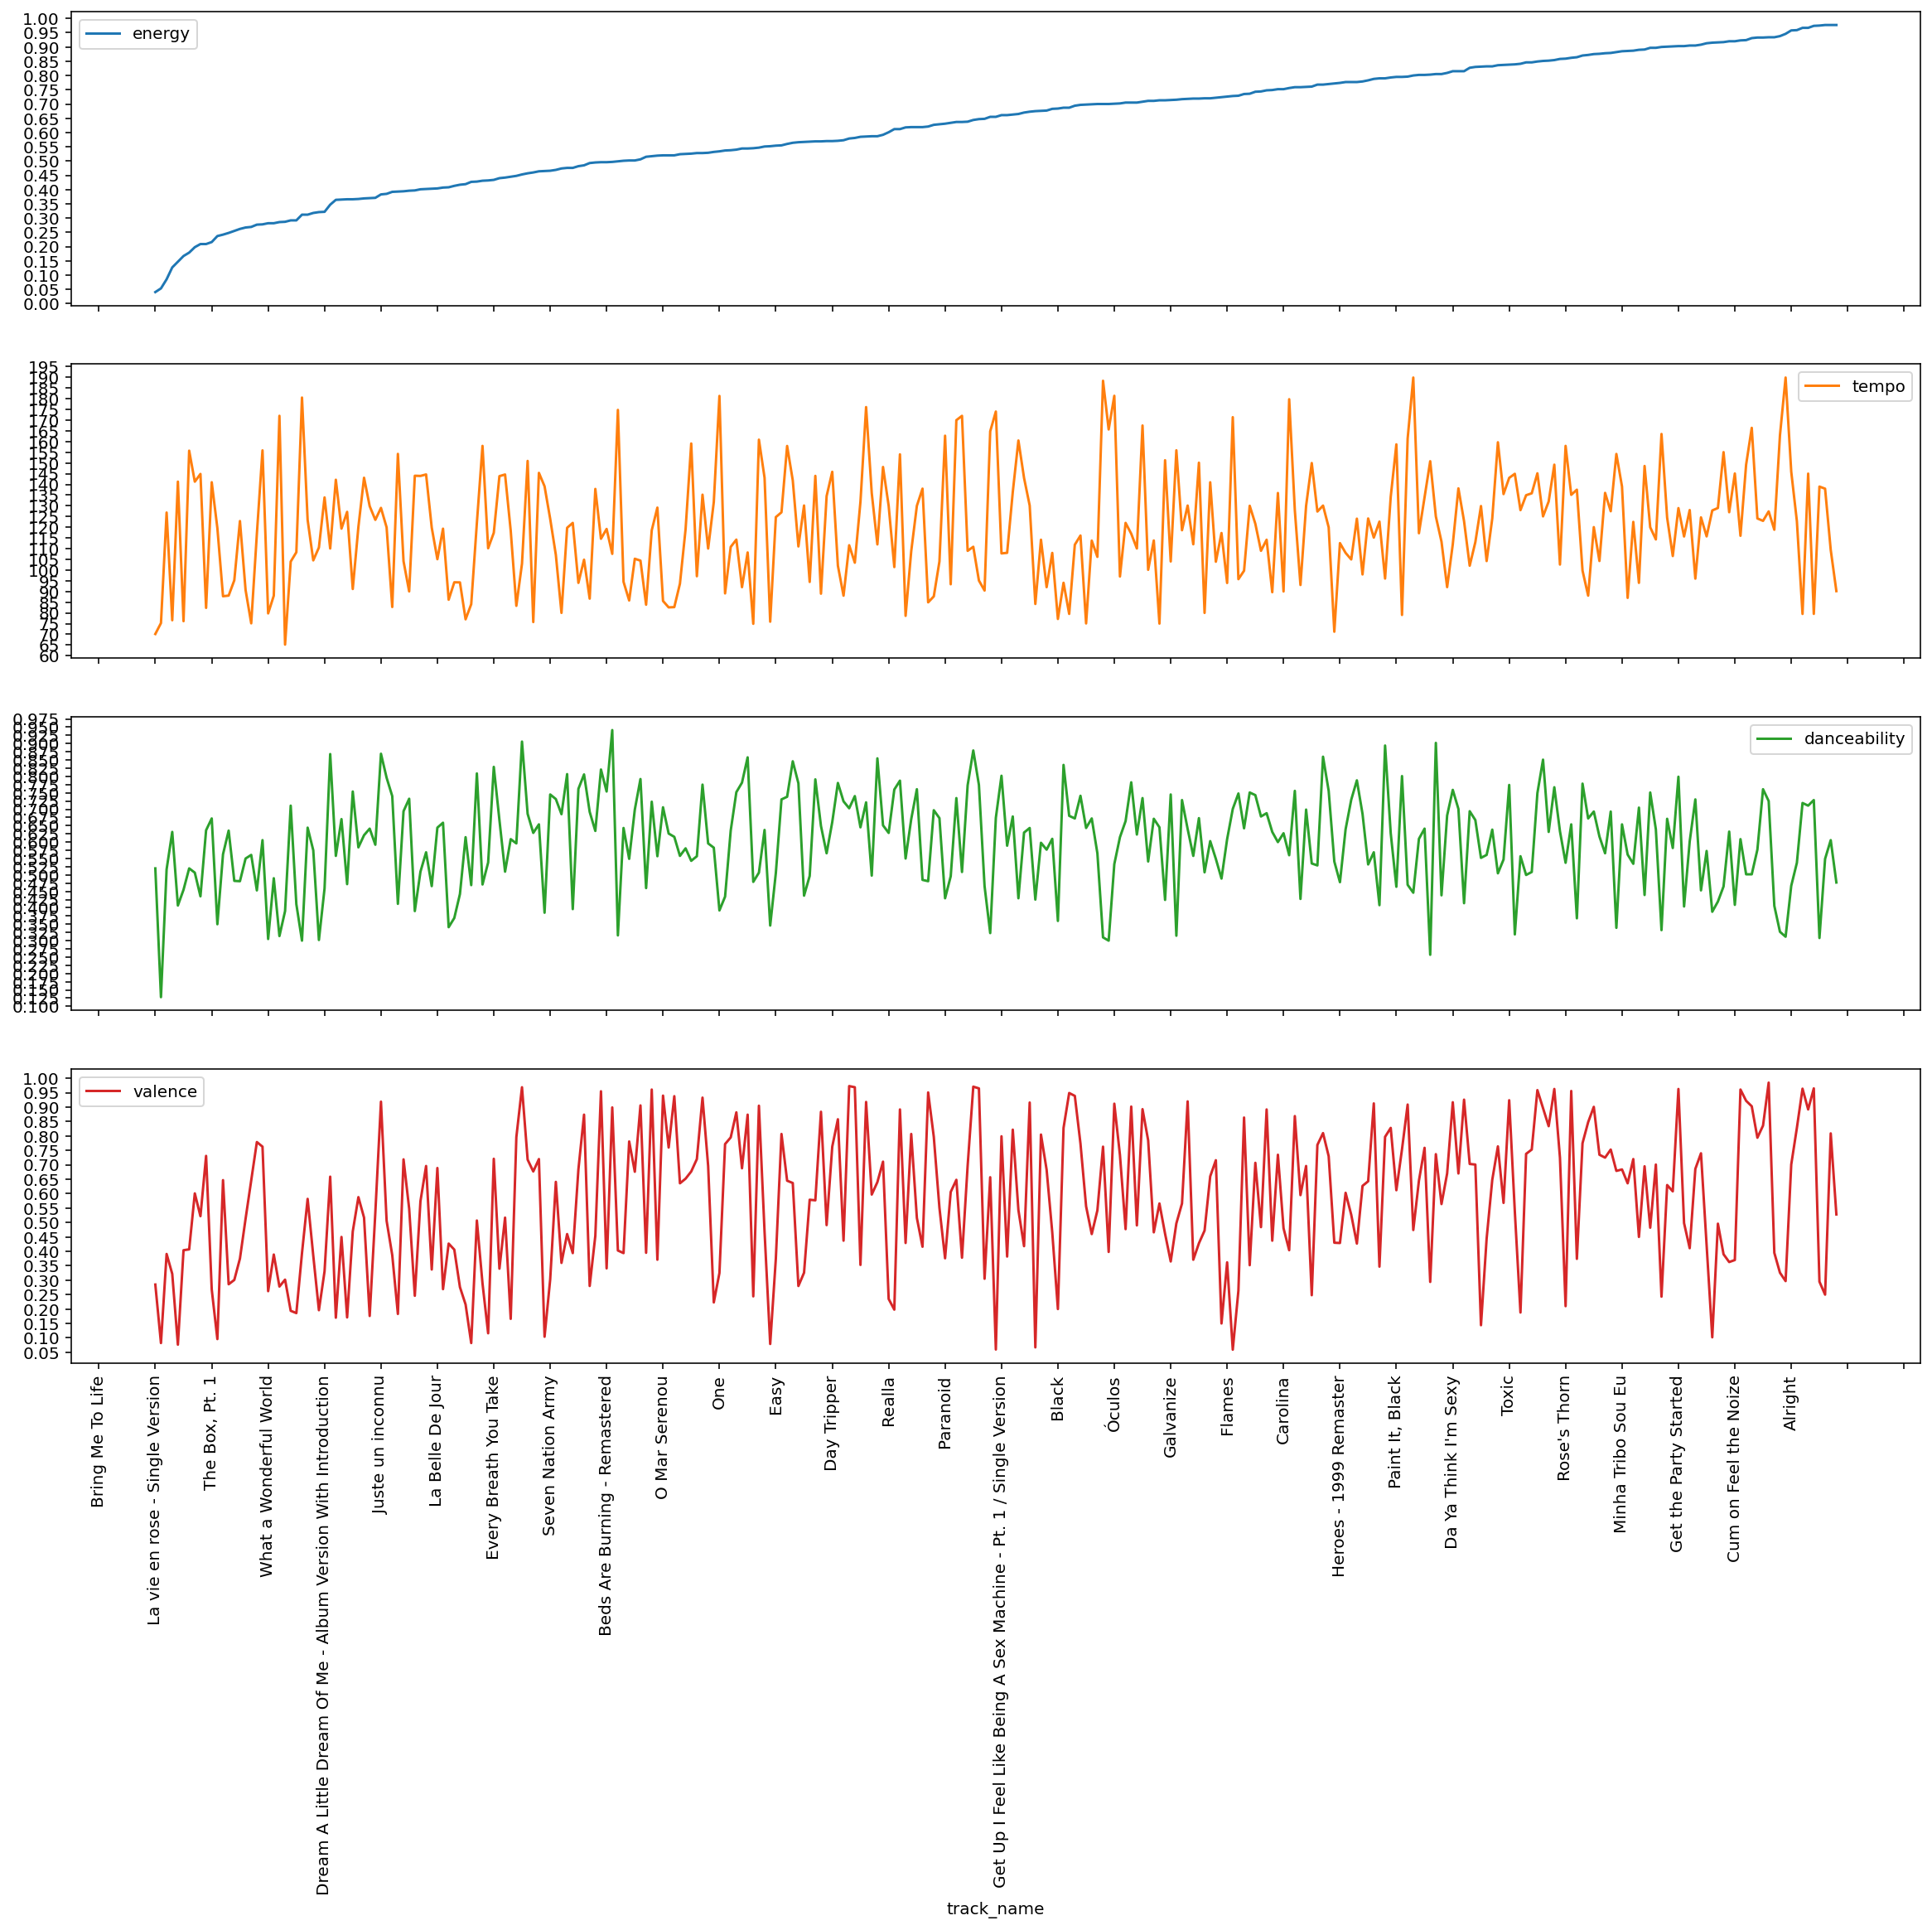

In [13]:
generate_plots(df_energy, fields=['energy', 'tempo', 'danceability', 'valence'])

In [14]:
# print(df_energy.drop(columns='track_id').sample(n=10, random_state=42).sort_index().to_html())

---
# Sort By `danceability`

In [15]:
df_danceability = df.sort_values(by='danceability').reset_index(drop=True)
ddisplay(df_danceability.sample(n=10, random_state=42).sort_index())

,track_name,url
5,What a Wonderful World,listen
9,Somewhere Only We Know,listen
77,Johnny B. Goode,listen
93,Óculos,listen
109,Here Comes The Sun - Remastered 2009,listen
164,Crazy,listen
173,"Ai, Ai, Ai...",listen
265,Toxic,listen
278,Get the Party Started,listen
281,The Way You Look Tonight,listen


---
# Sort By `valence`

In [16]:
df_valence = df.sort_values(by='valence').reset_index(drop=True)
ddisplay(df_valence.sample(n=10, random_state=42).sort_index())

,track_name,url
5,Zombie - Acoustic Version,listen
9,Crazy Mary (Remastered),listen
77,Tocando em Frente,listen
93,"Greenback Boogie (Theme from ""Suits"")",listen
109,O Segundo Sol - Acoustic,listen
164,Wake Me Up - Radio Edit,listen
173,Better Together,listen
265,Que Beleza,listen
278,All About That Bass - Live from Spotify London,listen
281,O Mar Serenou,listen


---
# Saving new playlist

In [17]:
df_energy.to_csv('new-playlist.csv', index=False)